In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print ("read training set, test set")
train = pd.read_csv('data/train_v2.csv').set_index('msno')
test = pd.read_csv('data/sample_submission_v2.csv').set_index('msno')
test['is_churn'] = np.nan

read training set, test set


In [3]:
user_logs2 = pd.read_csv('data/user_logs_v2.csv',parse_dates=['date'])
user_logs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396362 entries, 0 to 18396361
Data columns (total 9 columns):
msno          object
date          datetime64[ns]
num_25        int64
num_50        int64
num_75        int64
num_985       int64
num_100       int64
num_unq       int64
total_secs    float64
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 1.2+ GB


In [4]:
temp = pd.merge(train.reset_index(),user_logs2,on='msno',how='left')
temp['weekday'] = temp['date'].dt.dayofweek

In [5]:
from scipy.stats import kurtosis
from scipy.stats import skew
temp2 = (pd.DataFrame(temp.groupby('msno').agg({'is_churn':'mean',
                                       'date':'count',
                                       'num_25':['min','max','median','std'],
                                       'num_50':'median',
                                       'num_985':'median',
                                       'num_100':['min','max','median','std'],
                                       'num_unq':['min','max','median','std'],
                                       'total_secs':['min','max','median','std']})))

temp2['is_churn_all'] = temp2['is_churn','mean']
temp3 = pd.DataFrame(temp2.groupby('is_churn_all').agg(['mean','std']).unstack(level=1)).unstack()
temp3['diff'] = (temp3.iloc[:,1]-temp3.iloc[:,0])/temp3.iloc[:,1] * 100
temp3

0                      diff
is_churn_all                       0             1            
date       count  mean     14.096925     12.326554  -14.362251
                  std      11.354171     11.012643   -3.101237
is_churn   mean   mean      0.000000      1.000000  100.000000
                  std       0.000000      0.000000         NaN
num_100    max    mean     68.000773     65.321541   -4.101606
                  std      69.144651     60.730361  -13.855162
           median mean     20.906426     20.956128    0.237172
                  std      27.379432     26.813900   -2.109100
           min    mean      3.254761      3.465893    6.091710
                  std       9.748040      9.582641   -1.726022
           std    mean     18.956081     19.225555    1.401644
                  std      18.014340     16.586305   -8.609726
num_25     max    mean     23.460109     22.886236   -2.507503
                  std      32.179663     36.277125   11.294893
           median mean      3.350599      3.605810    7.077789
                  std       5.739461      7.254520   20.884350
           min    mean      0.324308      0.403652   19.656377
                  std       2.421512      2.382669   -1.630216
           std    mean      6.496639      6.662094    2.483525
                  std       8.280018      9.990734   17.123027
num_50     median mean      0.680906      0.757946   10.164431
                  std       1.362216      1.360012   -0.162111
num_985    median mean      0.497417      0.541292    8.105551
                  std       1.510116      1.310871  -15.199457
num_unq    max    mean     65.231497     64.026020   -1.882793
                  std      50.429857     51.138469    1.385673
           median mean     20.767364     21.325931    2.619192
                  std      20.418405     21.225365    3.801867
           min    mean      3.928687      4.274645    8.093272
                  std       7.173854      8.224323   12.772709
           std    mean     17.945639     18.523344    3.118794
                  std      12.836998     13.314588    3.586967
total_secs max    mean  17334.278329  16698.695043   -3.806185
                  std   16395.050279  14483.393295  -13.198958
           median mean   5544.857640   5572.855820    0.502403
                  std    6602.488949   6507.757573   -1.455668
           min    mean    949.601832   1004.572816    5.472076
                  std    2390.035344   2370.754835   -0.813265
           std    mean   4807.843873   4886.410631    1.607862
                  std    4280.319651   3947.259410   -8.437759

In [6]:
by_weekday = pd.DataFrame(temp.groupby(['weekday','is_churn']).agg({'msno':'count','num_25':'mean','num_unq':'mean','total_secs':'mean'}).unstack(level=1))
by_weekday_unstack = by_weekday.stack().reset_index()
by_weekday_unstack

,weekday,is_churn,msno,num_25,num_unq,total_secs
0,0.0,0,1596930,5.868146,28.126040,7765.928363
1,0.0,1,137183,6.311941,29.378713,7917.157821
2,1.0,0,1603319,5.819601,28.144029,7785.012211
3,1.0,1,135434,6.278468,29.407268,7941.736265
4,2.0,0,2004932,5.815764,28.106032,7766.343614
5,2.0,1,175363,6.263362,29.288778,7898.322708
6,3.0,0,2017106,5.810618,28.136327,7765.064963
7,3.0,1,174287,6.249651,29.362959,7893.362284
8,4.0,0,2022931,5.883584,28.271094,7685.875838
9,4.0,1,172441,6.315232,29.456591,7829.793032


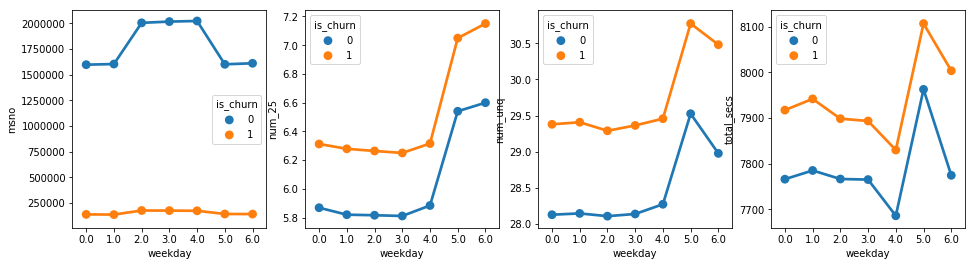

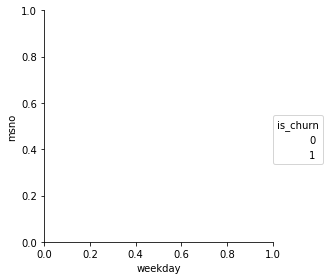

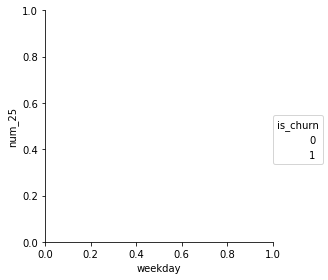

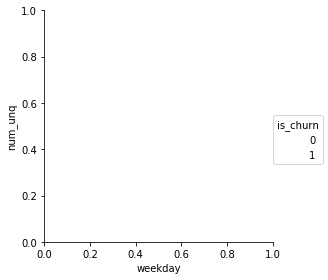

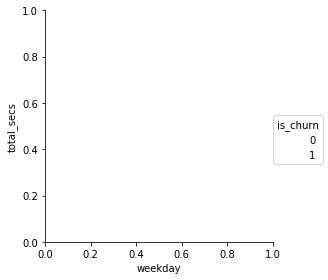

In [7]:
cols = ['msno','num_25','num_unq','total_secs']
v_weekday={'0.0':'Mon','1.0':'Tue','2.0':'Wed','3.0':'Thu','4.0':'Fri','5.0':'Sat','6.0':'Sun'}
f, axes = plt.subplots(1,4,figsize=(16,4))
for n,ax in enumerate(axes.flat):
    if n<4:
        sns.factorplot(x='weekday',y=cols[n],data=by_weekday_unstack,hue='is_churn',ax=ax)

In [20]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13532944 entries, 0 to 13749351
Data columns (total 11 columns):
msno          object
is_churn      int64
date          datetime64[ns]
num_25        float64
num_50        float64
num_75        float64
num_985       float64
num_100       float64
num_unq       float64
total_secs    float64
weekday       float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 1.8+ GB


In [23]:
temp2 = (pd.DataFrame(temp.groupby('msno').agg({'is_churn':'mean',
                                       'num_25':'skew',
                                       'num_50':'skew',
                                       'num_985':'skew',
                                       'num_100':'skew',
                                       'num_unq':'skew',
                                       'total_secs':'skew'})))
temp2['is_churn_all'] = temp2['is_churn','mean']
temp3 = pd.DataFrame(temp2.groupby('is_churn_all').agg(['mean']).unstack(level=1)).unstack()
temp3['diff'] = (temp3.iloc[:,1]-temp3.iloc[:,0])/temp3.iloc[:,1] * 100
temp3

KeyError: ('is_churn', 'mean')

In [9]:
from sklearn.utils import resample
temp=temp.dropna()
minority = pd.DataFrame(temp.loc[temp.is_churn==1,:])
majority = pd.DataFrame(temp.loc[temp.is_churn==0,:])
n_min = minority.shape[0]
print (minority.shape)
print (majority.shape)
downsample = resample(majority,replace=False,n_samples=n_min,random_state=0)
temp_balance = pd.concat([minority,downsample])

(1076478, 11)
(12456466, 11)


In [10]:
temp2 = pd.DataFrame(temp_balance.groupby('msno')
                     .agg({'is_churn':'mean',
                           'date':'count',
                           'num_25':'median',
                           'num_50':'median',
                           'num_985':'median',
                           'num_100':'median',
                           'num_unq':'median',
                           'total_secs':'median'}))
print (temp2.shape)
temp2.head()

(559825, 8)


,is_churn,date,num_25,num_50,num_985,num_100,num_unq,total_secs
msno,,,,,,,,
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0,2,8.0,3.0,6.0,26.5,42.5,8679.3690
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0,2,4.0,1.0,0.5,28.5,23.5,6927.0425
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0,4,5.0,2.0,2.0,31.0,40.0,8964.4210
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0,2,7.5,3.0,2.5,20.5,12.5,6026.4670
++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0,2,0.5,0.0,0.0,1.0,1.5,272.1055


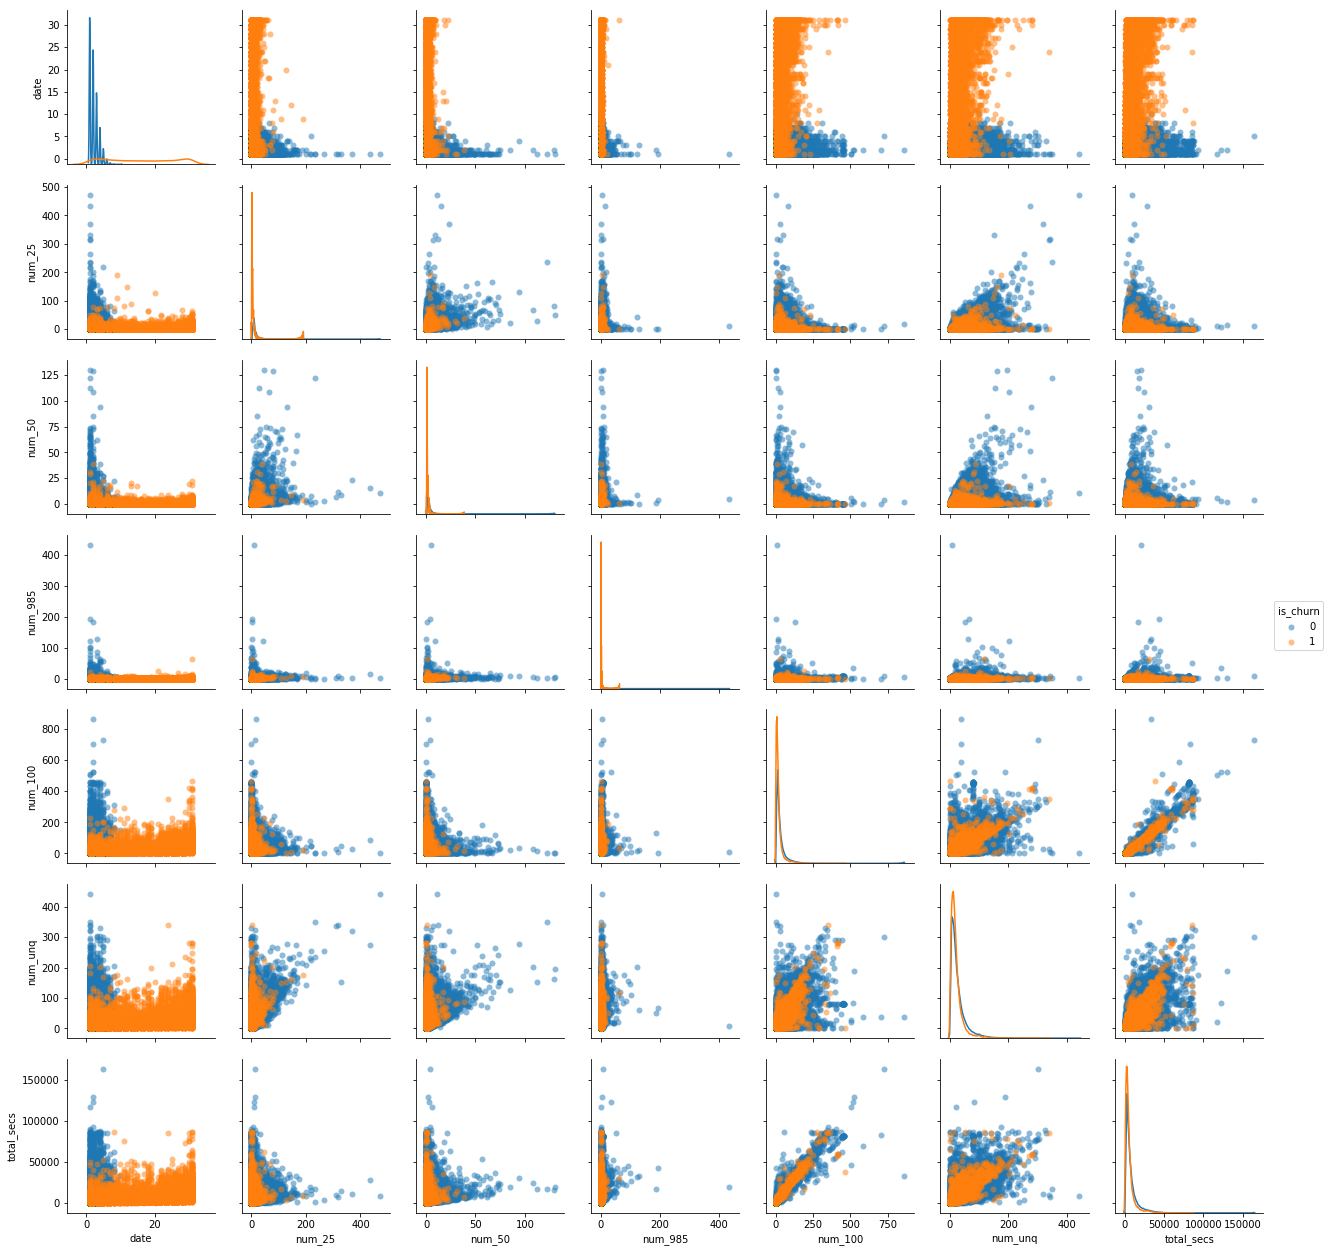

In [11]:
cols = ['is_churn','date','num_25','num_50','num_985','num_100','num_unq','total_secs']
sub_sample = temp2.sample(frac=0.2,random_state=0)
g = sns.pairplot(sub_sample,hue='is_churn',
                 x_vars = cols[1:],
                 y_vars = cols[1:],
                 plot_kws=dict(alpha=0.5,linewidths=0),
                 diag_kind="kde")

In [12]:
sub_sample.shape

(111965, 8)

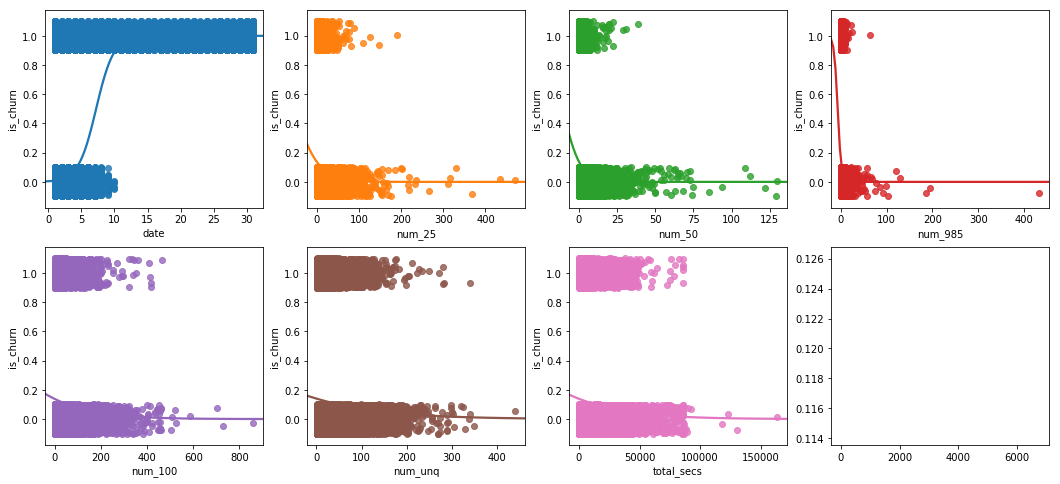

In [13]:
cols = ['is_churn','date','num_25','num_50','num_985','num_100','num_unq','total_secs']
f ,axes = plt.subplots(2,4,figsize=(18,8))
for n,ax in enumerate(axes.flat):
    if n<7:
        sns.regplot(x=cols[n+1],y='is_churn',data=sub_sample,
                    logistic=True, n_boot = 500,
                    x_jitter=None, y_jitter= 0.1, ax=ax)
    else:pass

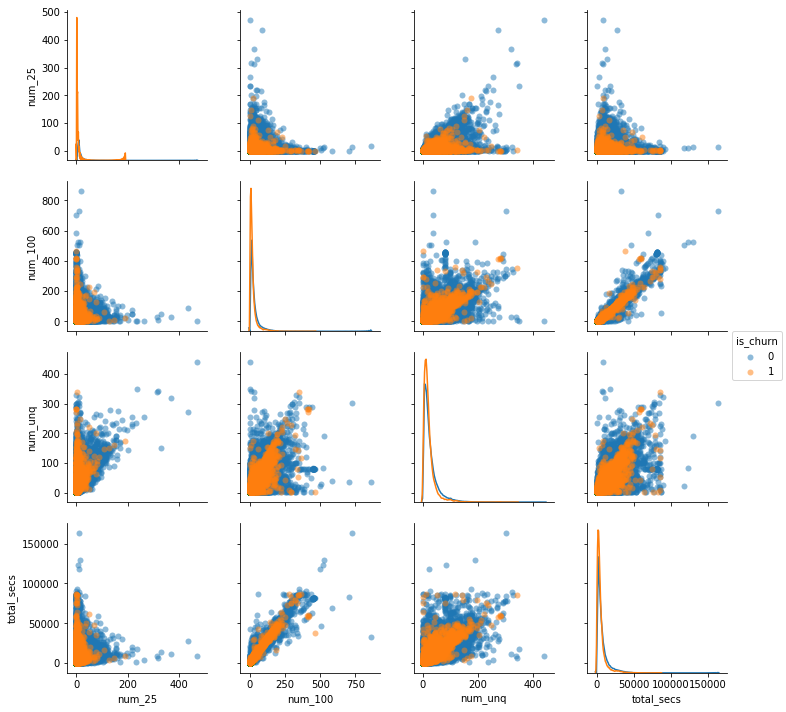

In [14]:
cols = ['is_churn','num_25','num_100','num_unq','total_secs']
g = sns.pairplot(sub_sample,hue='is_churn',
                 x_vars = cols[1:],
                 y_vars = cols[1:],
                 plot_kws=dict(alpha=0.5,linewidths=0),
                 diag_kind="kde")

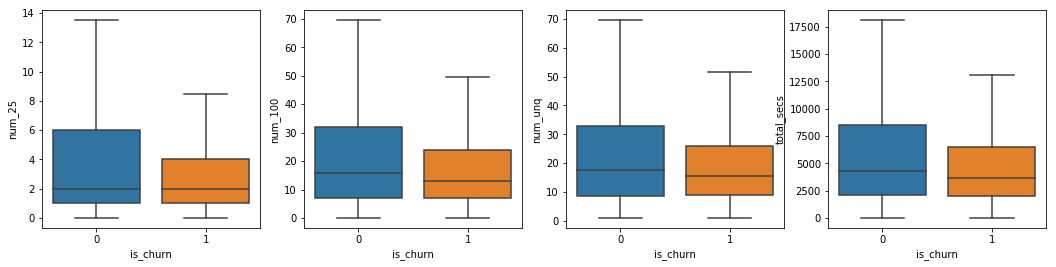

In [17]:
f ,axes = plt.subplots(1,4,figsize=(18,4))
for n,ax in enumerate(axes.flat):
    sns.boxplot(y=cols[n+1],x='is_churn',data=sub_sample,whis=1.5, ax=ax, showfliers=False)

IndexError: list index out of range

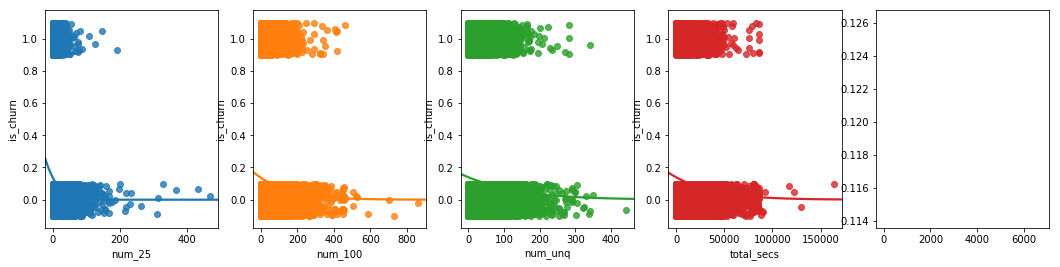

In [25]:
f ,axes = plt.subplots(1,5,figsize=(18,4))
for n,ax in enumerate(axes.flat):
    sns.regplot(x=cols[n+1],y='is_churn',data=sub_sample,
                logistic=True, n_boot = 100,
                x_jitter=None, y_jitter= 0.1, ax=ax)

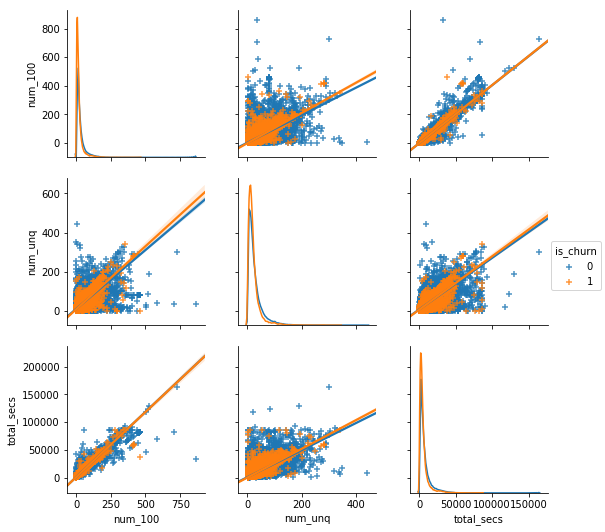

In [24]:
cols = ['is_churn','num_25','num_100','num_unq','total_secs']
g = sns.pairplot(sub_sample,hue='is_churn',
                 markers="+",
                 x_vars = cols[2:],
                 y_vars = cols[2:],
                 plot_kws=dict(n_boot=500, x_jitter=.1),
                 diag_kind="kde",
                 kind='reg')